# Jupyter Day 9 - Section 002
## Lec 9 - Intro to Classification

In [1]:
# Standard imports
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline
import seaborn as sns

## Reading in the chicken or egg data

In this lab, we are going to try out the KNN classification described in class. First, we're going to load up our data. This data is 100% made up by Dr. Munch and the code can generate it can be found on the [DataSets page](../../../DataSets/DataSets.md). Based on two inputs $x_1$ and $x_2$, we get to predict whether we have a `chicken` or an `egg`. 

<!-- ![A scatter plot of the data set](../../DataSets/ChickenEgg.png) -->

Go get the data from [the class website](../../../DataSets/DataSets.md) then run the following.

In [2]:
Chick_df = pd.read_csv('../data/ChickenEgg.csv')
Chick_df.head(10)

,x1,x2,Label
0,-3.156478,-1.110356,chicken
1,-3.547711,0.438432,chicken
2,-6.243875,5.288547,chicken
3,-5.398701,4.044941,chicken
4,3.556318,4.750270,chicken
5,3.208898,-1.319343,chicken
6,6.486065,-3.953278,egg
7,-1.126397,3.032450,chicken
8,1.820567,-6.872025,egg
9,-2.601184,5.737621,chicken


The first step is always to do some data exploration. 

&#9989; **<font color=red>Do this:</font>** Draw a scatter plot of your data with the relevant labels. 

*Hint: There are many ways to do this, but `sns.scatterplot` often works the fastest, and if you set `hue` and/or `style` to the `Label` column, you should get the labels drawn as color and/or symbol.*


<Axes: xlabel='x1', ylabel='x2'>

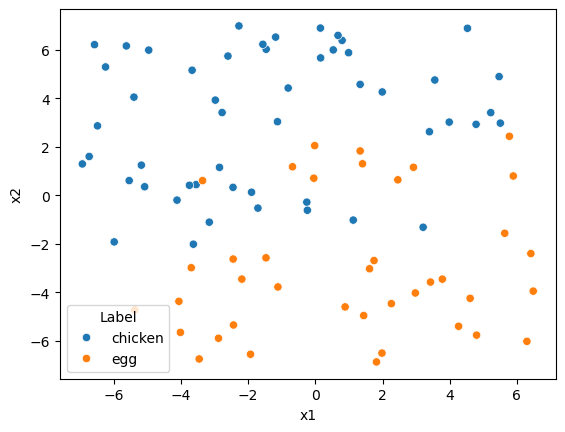

In [5]:
sns.scatterplot(x='x1', y='x2', data=Chick_df, hue='Label')

&#9989; **<font color=red>Do this:</font>** Based on your scatter plot, what you expect a KNN classifer with $k=1$ to predict for a data point at $(-4,4)$? What about at $(6,0)$?


*(-4,4) would be chicken, and (6,0) would be egg at $k=1$.*

## KNN with `sklearn`

Ok, but let's be honest, no one is going to do this by hand everytime. Let's make `sklearn` do it for us!

In [6]:
from sklearn.neighbors import KNeighborsClassifier

First, we're going to split our data into two pieces. The $X$ input variables, and the $Y$ output variable. 

In [7]:
X = Chick_df.drop('Label', axis =1)
y = Chick_df['Label']

In [8]:
X.head()

,x1,x2
0,-3.156478,-1.110356
1,-3.547711,0.438432
2,-6.243875,5.288547
3,-5.398701,4.044941
4,3.556318,4.750270


In [9]:
y.head(10)

0    chicken
1    chicken
2    chicken
3    chicken
4    chicken
5    chicken
6        egg
7    chicken
8        egg
9    chicken
Name: Label, dtype: object

Then the following code trains our classifier. 

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


...and this command provides a prediction for an input of  $(-2,3)$ input. 

In [11]:
knn.predict([[-2,3]])

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['chicken'], dtype=object)

&#9989; **<font color=red>Do this:</font>** What does your classifier predict for $(-4,4)$? What about at $(6,0)$? Are these the same that you guessed above? 


In [12]:
knn.predict([[-4,4]])

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['chicken'], dtype=object)

In [13]:
knn.predict([[6,0]])

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['egg'], dtype=object)

This predict function is pretty powerful. If I want to get all predictions for all of my inputs, I can just pass my $X$ dataframe.

In [14]:
knn.predict(X)

array(['chicken', 'chicken', 'chicken', 'chicken', 'chicken', 'chicken',
       'egg', 'chicken', 'egg', 'chicken', 'egg', 'egg', 'chicken', 'egg',
       'egg', 'chicken', 'chicken', 'chicken', 'egg', 'egg', 'egg',
       'chicken', 'chicken', 'egg', 'egg', 'chicken', 'egg', 'chicken',
       'chicken', 'chicken', 'chicken', 'chicken', 'egg', 'chicken',
       'chicken', 'egg', 'chicken', 'chicken', 'egg', 'chicken', 'egg',
       'chicken', 'chicken', 'chicken', 'egg', 'egg', 'egg', 'egg',
       'chicken', 'chicken', 'egg', 'chicken', 'chicken', 'egg',
       'chicken', 'egg', 'egg', 'egg', 'chicken', 'chicken', 'chicken',
       'chicken', 'egg', 'chicken', 'egg', 'chicken', 'chicken',
       'chicken', 'egg', 'chicken', 'egg', 'chicken', 'egg', 'chicken',
       'egg', 'egg', 'chicken', 'egg', 'chicken', 'chicken', 'egg',
       'chicken', 'egg', 'egg', 'egg', 'chicken', 'chicken', 'egg', 'egg',
       'chicken'], dtype=object)

Remember what all the actual labels were? 

In [15]:
np.array(y)

array(['chicken', 'chicken', 'chicken', 'chicken', 'chicken', 'chicken',
       'egg', 'chicken', 'egg', 'chicken', 'egg', 'egg', 'chicken', 'egg',
       'egg', 'chicken', 'chicken', 'chicken', 'egg', 'egg', 'egg',
       'chicken', 'chicken', 'egg', 'egg', 'chicken', 'egg', 'chicken',
       'chicken', 'chicken', 'chicken', 'chicken', 'egg', 'chicken',
       'chicken', 'egg', 'chicken', 'chicken', 'egg', 'chicken', 'egg',
       'chicken', 'chicken', 'chicken', 'egg', 'egg', 'egg', 'egg',
       'chicken', 'chicken', 'egg', 'chicken', 'chicken', 'egg',
       'chicken', 'egg', 'egg', 'egg', 'chicken', 'chicken', 'chicken',
       'chicken', 'egg', 'chicken', 'egg', 'chicken', 'chicken',
       'chicken', 'egg', 'chicken', 'egg', 'chicken', 'egg', 'chicken',
       'egg', 'egg', 'chicken', 'egg', 'chicken', 'chicken', 'egg',
       'chicken', 'egg', 'egg', 'egg', 'chicken', 'chicken', 'egg', 'egg',
       'chicken'], dtype=object)

Now, I could sit here and go through one by one to see if they have the same predicted value as the label to decide on my accuracy. But, as usual, `sklearn` comes to the rescue. 

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(knn.predict(X),y)

1.0

## Train test splits 

Ok, so you got 100% accuracy! You're done, right???? 

**<font color=red>Wrong!</font>**

We know better than to report our training accuracy as our actual accuracy! So, let's set up some basic train/test splits!

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In this case, the `X_train` data frame has the inputs we'll use for training...

In [18]:
print(X_train.shape)
X_train.head()

(81, 2)


,x1,x2
75,-2.445548,-2.630740
23,2.920934,1.152175
38,-2.881874,-5.895848
18,0.886421,-4.603679
12,1.334163,4.570304


..., and the `y_train` has the outputs for those same data points. 

In [19]:
print(y_train.shape)
y_train.head()

(81,)


75        egg
23        egg
38        egg
18        egg
12    chicken
Name: Label, dtype: object

The `X_test` data frame has the rest of the inputs which we'll use for testing, and the `y_test` has the outputs for those same data points. We don't get to touch these until after the training is all done! Otherwise we are data-snooping!

In [20]:
print(X_test.shape)
X_test.head(10)

(9, 2)


,x1,x2
46,1.747229,-2.692229
15,1.128787,-1.024619
89,-4.116941,-0.201863
9,-2.601184,5.737621
59,-1.561367,6.222374
5,3.208898,-1.319343
78,-1.898098,0.124103
26,1.613779,-3.030344
69,-2.976418,3.921586


In [21]:
print(y_test.shape)
y_test.head(10)

(9,)


46        egg
15    chicken
89    chicken
9     chicken
59    chicken
5     chicken
78    chicken
26        egg
69    chicken
Name: Label, dtype: object

&#9989; **<font color=red>Do this:</font>** Build a KNN classifier using $k=3$ neighbors, and train it on your `X_train` and `y_train` data. Call it `knn` like before. 

- What is your training accuracy? 
- What is your testing accuracy? 

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
accuracy_score(knn.predict(X_train),y_train)

0.9753086419753086

In [26]:
accuracy_score(knn.predict(X_test),y_test)

0.8888888888888888

I want to show you one more nice command in here. Remember that KNNs work by returning the label of the most frequently seen label among the $k$ numbers, but that doesn't mean every neighbor had that label. 

The `predict_proba` function will tell you the percentage of each that was seen. 

In [27]:
knn.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

## Bayes classifier 

Now, because I generated our data so I know the real Bayes decision boundary, we can take a look at how our results match up with the Bayes classifier. 


First, I am going to set up some code that will figure out what your model, named `knn` above hopfully, will predict for a grid of numbers covering our $[-7,7] \times [-7,7]$ box. 

In [28]:
# Run this cell, we just need to generate some inputs 
# to be able to draw figures in a moment. 
t = np.linspace(-7,7,28)
X_mesh,Y_mesh = np.meshgrid(t,t)
X_mesh_flat = X_mesh.flatten()
Y_mesh_flat = Y_mesh.flatten()

# The test_all_df is a dataframe with all the possible inputs of x1 and x2, so if we predict on all of them we can see the decision boundary.
test_all_df = pd.DataFrame({'x1':X_mesh_flat,'x2':Y_mesh_flat})


In [29]:
pred_all = knn.predict(test_all_df)
def to_int(chickegg):
    if chickegg == 'egg':
        return -1
    else:
        return 1
    
pred_all = np.array([to_int(x) for x in pred_all])
pred_all.shape
pred_all = pred_all.reshape([28,28])

Then this will plot these predictions on our 2D plane. 

[Text(1, -1, 'egg'), Text(1, 1, 'chicken')]

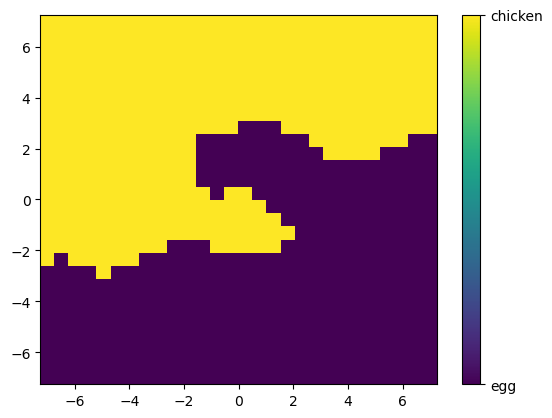

In [30]:
plt.pcolor(X_mesh,Y_mesh,pred_all)

cbar = plt.colorbar(ticks=[-1, 1])
cbar.ax.set_yticklabels(['egg','chicken'])

# Just for comparison, I can also plot my original data points on top. Uncomment the line below to see that.
# sns.scatterplot(data = Chick_df, x = 'x1', y = 'x2', style = 'Label').set(title = 'Chicken or Egg?')

&#9989; **<font color=red>Q:</font>** Using this plot, what is your model going to predict for a data point at $(-4,6)$? 

*Your answer here*

Note that since I generated this data, I know where the line was between the two regions used to generate it. In my case, I happened to use the function

$$
f(x_1,x_2) = (x_2)^3 - x_2 -x_1
$$

and labeled a new data point based on whether $f(x_1,x_2) + \varepsilon$ was positive or negative. 

Below, you can see $f(x_1,x_2)$ (in this case, the Bayes classifier) drawn on top of your model's predictions. How similar did your KNN get? 

&#9989; **<font color=red>Q:</font>** Where are the regions that your model predicts something different than the Bayes classifier? 

In [ ]:
# This command tries to draw a line between the two regions 
plt.pcolor(X_mesh,Y_mesh,pred_all)

cbar = plt.colorbar(ticks=[-1, 1])
cbar.ax.set_yticklabels(['egg','chicken'])

# This draws the line I used to generate the data 
ty = np.linspace(-2.1,2.1,100)
tx = ty**3 - ty
plt.plot(tx,ty, color = 'grey')

# Again, you can uncomment the line below to the original data overlaid.
# sns.scatterplot(data = Chick_df, x = 'x1', y = 'x2', style = 'Label').set(title = 'Chicken or Egg?')

## Messing with $k$

Finally, we're going to generate plots like Fig 2.17 in the book, where we look at the training and testing errors vs the flexibility (in this case, $1/k$) of the model used. 

In [ ]:
# Our choices of $K$
# Note that the graph will use $1/k$ for flexibility
Kinv = np.array([0.04, 0.05,0.2,0.5,1])
Ks = 1/Kinv
Ks = Ks.astype(int)
print(Ks)

Accuracies = []
TrainAccuracies = []


# I'm going to run this model for all my choices of k
for k in Ks:
    thisruntest = []
    thisruntrain = []
    
    # For each choice of k, i'll do this 10 times and average
    for runNum in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        
        # Figure out my training error rate 
        acctrain = accuracy_score(knn.predict(X_train),y_train)
        thisruntrain.append(1-acctrain)
        
        # Figure out my testing error rate
        acctest = accuracy_score(knn.predict(X_test),y_test)
        thisruntest.append(1-acctest)
    
    # Keep the average over the 10 runs
    TrainAccuracies.append(np.average(thisruntrain))
    Accuracies.append(np.average(thisruntest))

    
# Plot train and test with x-axis on a log scale
plt.semilogx(1/Ks,Accuracies, label = 'Test', marker = 'x')
plt.semilogx(1/Ks,TrainAccuracies, label = 'Train', marker = 'o')
plt.xlabel('1/k')
plt.ylabel('Error rate')
plt.legend()
plt.show()

&#9989; **<font color=red>Q:</font>** Based on your graph above
- What do you notice about the shape of the train and test error plots? 
- What would you choose for $k$ based on this data? 



-----
### Congratulations, we're done!
Initially created by Dr. Liz Munch, adapted by Mengsen Zhang Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
[[0] * 3 for _ in range(3)]

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]